# Preparing the dataset and cleaning it up with Pandas

## First let's import pandas API


In [1]:
import pandas as pd


## Now let's read in our csv data file

In [2]:
df = pd.read_csv("Evictions.csv")


#this will show me the first 10 rows in the data sheet
df.head(10)


,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50365/19,352435,319 WEST 94TH STREET,C103,03/25/2019,Thomas,Bia,Residential,MANHATTAN,10025,Not an Ejectment,Possession,40.794205,-73.974734,7.0,6.0,183.0,1034178.0,1.012530e+09,Upper West Side
1,B068159/16,379048,2332 CRESTON AVE,41,04/25/2017,Richard,McCoy,Residential,BRONX,10468,Not an Ejectment,Possession,40.858643,-73.900402,5.0,14.0,23703.0,2013777.0,2.031640e+09,Fordham South
2,59891/16,320691,2670 BAINBRIDGE AVENUE,2F,02/21/2017,John,Villanueva,Residential,BRONX,10458,Not an Ejectment,Possession,40.865470,-73.891472,7.0,15.0,40502.0,2016620.0,2.032870e+09,Bedford Park-Fordham North
3,75708/18,115775,18-24 25TH ROAD,1,04/23/2019,Maxine,Chevlowe,Residential,QUEENS,11102,Not an Ejectment,Possession,40.774861,-73.926140,1.0,22.0,91.0,4019956.0,4.008870e+09,Old Astoria
4,900940/18,86395,3005 EASTCHESTER RO AD,STOREFRONT,11/08/2018,Justin,Grossman,Commercial,BRONX,10469,Not an Ejectment,Possession,40.869607,-73.842766,12.0,12.0,358.0,2061802.0,2.047620e+09,Eastchester-Edenwald-Baychester
5,Q75179/18,97002,153-12 FOCH BLVD.,PRIVATE HOUSE,07/12/2019,Ileana,Rivera,Residential,QUEENS,11434,Not an Ejectment,Possession,40.681478,-73.789636,12.0,28.0,288.0,4264878.0,4.122040e+09,Baisley Park
6,59927/18,17756,156-43 79TH STREET,NaN,02/25/2019,Edward,Guida,Residential,QUEENS,11414,Not an Ejectment,Possession,40.661535,-73.854088,10.0,32.0,6202.0,4448225.0,4.139428e+09,Lindenwood-Howard Beach
7,61859/19,95620,2301 65TH STREET,3D,06/14/2019,Henry,Daley,Residential,BROOKLYN,11204,Not an Ejectment,Possession,40.612436,-73.979088,11.0,44.0,436.0,3172477.0,3.065590e+09,Bensonhurst East
8,63989/17,23118,1 BEACH 105TH STREET,3D,01/08/2018,Gary,Rose,Residential,QUEENS,11694,Not an Ejectment,Possession,40.581498,-73.825268,14.0,32.0,938.0,4303819.0,4.161770e+09,Breezy Point-Belle Harbor-Rockaway Park-Broad ...
9,52272/18,350225,65 JESUP PLACE,B,03/27/2019,Thomas,Bia,Residential,BRONX,10452,Not an Ejectment,Possession,40.842213,-73.920384,4.0,16.0,21302.0,2008687.0,2.028720e+09,Highbridge


## Next I am going to display some info on my dataset to get a better idea of what I am working with

In [3]:
#Show a list of columns for easier refernce to check which ones I am interested in
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67728 entries, 0 to 67727
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Court Index Number         67728 non-null  object 
 1   Docket Number              67728 non-null  int64  
 2   Eviction Address           67728 non-null  object 
 3   Eviction Apartment Number  56519 non-null  object 
 4   Executed Date              67728 non-null  object 
 5   Marshal First Name         67728 non-null  object 
 6   Marshal Last Name          67728 non-null  object 
 7   Residential/Commercial     67728 non-null  object 
 8   BOROUGH                    67728 non-null  object 
 9   Eviction Postcode          67728 non-null  int64  
 10  Ejectment                  67728 non-null  object 
 11  Eviction/Legal Possession  67728 non-null  object 
 12  Latitude                   61284 non-null  float64
 13  Longitude                  61284 non-null  flo



## Now I see a few things I want to change before I continue

- I want to replace the spaces in between the column names with an underscore so that they will be easier to work with
- I want to convert the Executed Date column type to a datetime instead of an object
- I want to rename Residential/Commercial, BOROUGH and NTA columns.


In [4]:
#replace the spaces between the column names with "_" 
df.columns = df.columns.str.replace(' ','_')

#convert date executed type object into datetime
df['Executed_Date']= pd.to_datetime(df['Executed_Date'])

#renemaing the selected columns with rename function
df = df.rename(
    columns = {'Residential/Commercial':'Property_Type',
               'BOROUGH':'Borough',
               'NTA':'Neighborhood_Tabulation_Area'})

#confirm changes made
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67728 entries, 0 to 67727
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Court_Index_Number            67728 non-null  object        
 1   Docket_Number_                67728 non-null  int64         
 2   Eviction_Address              67728 non-null  object        
 3   Eviction_Apartment_Number     56519 non-null  object        
 4   Executed_Date                 67728 non-null  datetime64[ns]
 5   Marshal_First_Name            67728 non-null  object        
 6   Marshal_Last_Name             67728 non-null  object        
 7   Property_Type                 67728 non-null  object        
 8   Borough                       67728 non-null  object        
 9   Eviction_Postcode             67728 non-null  int64         
 10  Ejectment                     67728 non-null  object        
 11  Eviction/Legal_Possession   

## After making those changes I am going to explore the data a little 

### First I will call the describe function

This will give me descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.


In [5]:
df.describe()

,Docket_Number_,Eviction_Postcode,Latitude,Longitude,Community_Board,Council_District,Census_Tract,BIN,BBL
count,67728.000000,67728.000000,61284.000000,61284.000000,61284.000000,61284.000000,61284.000000,6.116600e+04,6.116600e+04
mean,155307.265370,10789.837128,40.753102,-73.907649,7.996769,23.642957,8456.594348,2.695826e+06,2.619832e+09
std,148902.633357,519.090551,0.091126,0.067936,4.560424,13.688485,21583.500389,1.114934e+06,1.061498e+09
min,103.000000,0.000000,40.499050,-74.251262,1.000000,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,60804.750000,10454.000000,40.672777,-73.944166,4.000000,13.000000,197.000000,2.010236e+06,2.028240e+09
50%,91947.000000,10472.000000,40.754730,-73.909531,8.000000,18.000000,377.000000,2.127296e+06,2.055345e+09
75%,292846.250000,11229.000000,40.837047,-73.871028,12.000000,36.000000,966.000000,3.336552e+06,3.071210e+09
max,496987.000000,12221.000000,40.911588,-73.701430,18.000000,51.000000,157903.000000,5.171959e+06,5.080490e+09


I didn't notice anything too interesting when calling the descibe function because most of these column values are  categorical.

## Let's  check some quick visuals

array([[<AxesSubplot:title={'center':'Docket_Number_'}>,
        <AxesSubplot:title={'center':'Executed_Date'}>,
        <AxesSubplot:title={'center':'Eviction_Postcode'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Community_Board'}>],
       [<AxesSubplot:title={'center':'Council_District'}>,
        <AxesSubplot:title={'center':'Census_Tract'}>,
        <AxesSubplot:title={'center':'BIN'}>],
       [<AxesSubplot:title={'center':'BBL'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

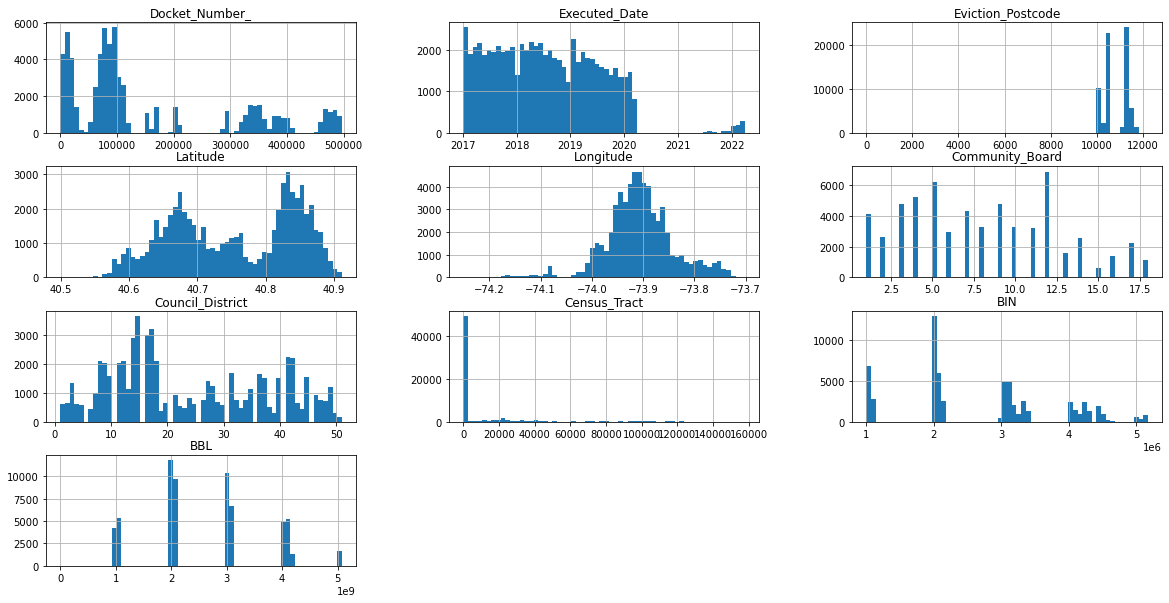

In [6]:
df.hist(bins=60, figsize=(20,10))

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

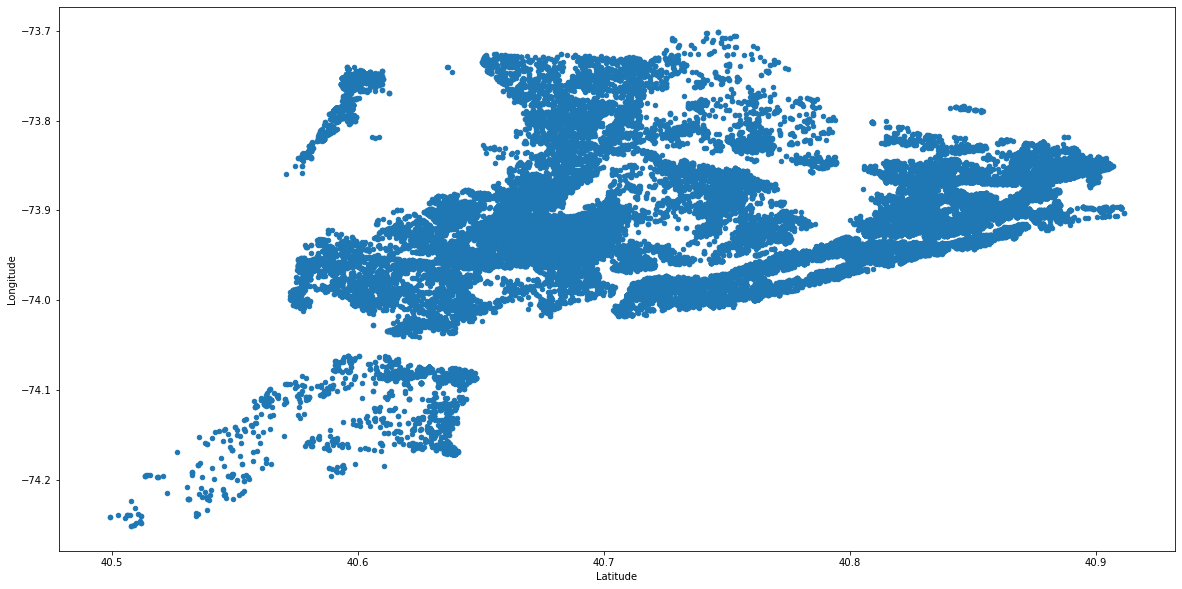

In [7]:
df[['Latitude', 'Longitude']].plot(kind='scatter', x = 'Latitude', y='Longitude', figsize=(20,10))

### Next, I want to check if there are duplicates in the dataset 

In [8]:
#I wrapped the duplicated call in a dataframe for better visualization
pd.DataFrame(df.duplicated().value_counts())

,0
False,67184
True,544


Lets take a further look at these duplicates

In [9]:
#pull up a list of only duplicates located in the dataset
df[df.duplicated()]

,Court_Index_Number,Docket_Number_,Eviction_Address,Eviction_Apartment_Number,Executed_Date,Marshal_First_Name,Marshal_Last_Name,Property_Type,Borough,Eviction_Postcode,Ejectment,Eviction/Legal_Possession,Latitude,Longitude,Community_Board,Council_District,Census_Tract,BIN,BBL,Neighborhood_Tabulation_Area
69,42888/19,358713,4338 BYRON AVENUE,2,2020-02-18,Thomas,Bia,Residential,BRONX,10466,Not an Ejectment,Possession,40.896204,-73.853790,12.0,11.0,434.0,2069846.0,2.050450e+09,Woodlawn-Wakefield
266,68501/19,357703,321 EAST 22ND STREET,6X,2020-01-03,Thomas,Bia,Residential,MANHATTAN,10010,Not an Ejectment,Possession,40.736934,-73.980684,6.0,2.0,64.0,1020570.0,1.009280e+09,Gramercy
519,73848/19,359312,520 WEST 17TH STREET,STORAGE,2020-03-12,Thomas,Bia,Commercial,MANHATTAN,10011,Not an Ejectment,Possession,40.744278,-74.007340,4.0,3.0,99.0,1012278.0,1.006888e+09,Hudson Yards-Chelsea-Flatiron-Union Square
581,27585/19,356034,1221 SHAKESPEARE AVENUE,1,2020-02-04,Thomas,Bia,Residential,BRONX,10452,Not an Ejectment,Possession,40.837699,-73.923280,4.0,16.0,199.0,2003166.0,2.025100e+09,Highbridge
631,50856/19,358805,1605 HONE AVENUE,2,2020-03-10,Thomas,Bia,Residential,BRONX,10461,Not an Ejectment,Possession,40.845983,-73.852458,11.0,13.0,252.0,2087145.0,2.040990e+09,Van Nest-Morris Park-Westchester Square
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67250,39965/19,358119,745 FOX STREET,709,2020-01-07,Thomas,Bia,Residential,BRONX,10455,Not an Ejectment,Possession,40.815204,-73.898714,2.0,8.0,85.0,2005517.0,2.027070e+09,Longwood
67272,901449/19,358245,3210 WEBSTER AVENUE,AUTO BODY,2020-01-21,Thomas,Bia,Commercial,BRONX,10467,Not an Ejectment,Possession,40.873020,-73.874870,7.0,11.0,42901.0,2018680.0,2.033570e+09,Norwood
67348,69561/19,358386,541 WEST 29TH STREET,STORAGE,2020-03-04,Thomas,Bia,Commercial,MANHATTAN,10001,Not an Ejectment,Possession,40.752059,-74.002862,4.0,3.0,99.0,1080331.0,1.007010e+09,Hudson Yards-Chelsea-Flatiron-Union Square
67429,300495/21,13711,7 NAVY PIER COURT APT #2014,2014,2021-09-02,Robert,Renzulli,Residential,STATEN ISLAND,10304,Not an Ejectment,Possession,40.628828,-74.074387,1.0,49.0,21.0,5158986.0,5.004878e+09,Stapleton-Rosebank


I wanted to double check that the duplicates found were indeed duplicates and where they were indexed at

In [10]:
#locates the row where this numerical value matches under column Docket_Number
df.loc[(df['Docket_Number_']== 358245)]

,Court_Index_Number,Docket_Number_,Eviction_Address,Eviction_Apartment_Number,Executed_Date,Marshal_First_Name,Marshal_Last_Name,Property_Type,Borough,Eviction_Postcode,Ejectment,Eviction/Legal_Possession,Latitude,Longitude,Community_Board,Council_District,Census_Tract,BIN,BBL,Neighborhood_Tabulation_Area
67271,901449/19,358245,3210 WEBSTER AVENUE,AUTO BODY,2020-01-21,Thomas,Bia,Commercial,BRONX,10467,Not an Ejectment,Possession,40.87302,-73.87487,7.0,11.0,42901.0,2018680.0,2.033570e+09,Norwood
67272,901449/19,358245,3210 WEBSTER AVENUE,AUTO BODY,2020-01-21,Thomas,Bia,Commercial,BRONX,10467,Not an Ejectment,Possession,40.87302,-73.87487,7.0,11.0,42901.0,2018680.0,2.033570e+09,Norwood


## Conclusion of Findings

I found that there were 544 duplicated rows of the same exact info accross all columns. Usually they are right after the other but in some cases were inputed futher apart.

Now I will delete these duplicates by using the drop duplicates function

In [11]:
#drop the duplicates from the dataset
df = df.drop_duplicates()
df

,Court_Index_Number,Docket_Number_,Eviction_Address,Eviction_Apartment_Number,Executed_Date,Marshal_First_Name,Marshal_Last_Name,Property_Type,Borough,Eviction_Postcode,Ejectment,Eviction/Legal_Possession,Latitude,Longitude,Community_Board,Council_District,Census_Tract,BIN,BBL,Neighborhood_Tabulation_Area
0,50365/19,352435,319 WEST 94TH STREET,C103,2019-03-25,Thomas,Bia,Residential,MANHATTAN,10025,Not an Ejectment,Possession,40.794205,-73.974734,7.0,6.0,183.0,1034178.0,1.012530e+09,Upper West Side
1,B068159/16,379048,2332 CRESTON AVE,41,2017-04-25,Richard,McCoy,Residential,BRONX,10468,Not an Ejectment,Possession,40.858643,-73.900402,5.0,14.0,23703.0,2013777.0,2.031640e+09,Fordham South
2,59891/16,320691,2670 BAINBRIDGE AVENUE,2F,2017-02-21,John,Villanueva,Residential,BRONX,10458,Not an Ejectment,Possession,40.865470,-73.891472,7.0,15.0,40502.0,2016620.0,2.032870e+09,Bedford Park-Fordham North
3,75708/18,115775,18-24 25TH ROAD,1,2019-04-23,Maxine,Chevlowe,Residential,QUEENS,11102,Not an Ejectment,Possession,40.774861,-73.926140,1.0,22.0,91.0,4019956.0,4.008870e+09,Old Astoria
4,900940/18,86395,3005 EASTCHESTER RO AD,STOREFRONT,2018-11-08,Justin,Grossman,Commercial,BRONX,10469,Not an Ejectment,Possession,40.869607,-73.842766,12.0,12.0,358.0,2061802.0,2.047620e+09,Eastchester-Edenwald-Baychester
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67723,R 50452/17,68450,182 ARLINGTON AVENUE,NaN,2017-03-29,Steven,Powell,Residential,STATEN ISLAND,10303,Not an Ejectment,Possession,40.635485,-74.167531,1.0,49.0,323.0,5028488.0,5.012670e+09,Mariner's Harbor-Arlington-Port Ivory-Granitev...
67724,N66489/17,81749,600 WEST 136TH STREE T,6F,2017-09-27,Ileana,Rivera,Residential,MANHATTAN,10031,Not an Ejectment,Possession,40.820935,-73.954996,9.0,7.0,22301.0,1059959.0,1.020020e+09,Manhattanville
67725,60675/17-1,208636,115 LINCOLN ROAD,3N,2020-01-09,Richard,Capuano,Residential,BROOKLYN,11225,Not an Ejectment,Possession,40.661077,-73.958799,9.0,40.0,79801.0,3379187.0,3.013270e+09,Prospect Lefferts Gardens-Wingate
67726,B42335/17,83318,1131-1133 OGDEN AVEN UE,12A,2017-12-13,Ileana,Rivera,Residential,BRONX,10452,Not an Ejectment,Possession,40.836286,-73.927496,4.0,16.0,199.0,2088158.0,2.025260e+09,Highbridge


As we can see, there are now 67,184 rows left in the dataset after deleting the duplicates. Lets double check that all duplicates were removed.

In [12]:
pd.DataFrame(df.duplicated().value_counts())

,0
False,67184


Great! No more duplictes.

## Now let's check for null values

In [13]:
#Now let us see if there are any null values.
df.isna().sum()

Court_Index_Number                  0
Docket_Number_                      0
Eviction_Address                    0
Eviction_Apartment_Number       11166
Executed_Date                       0
Marshal_First_Name                  0
Marshal_Last_Name                   0
Property_Type                       0
Borough                             0
Eviction_Postcode                   0
Ejectment                           0
Eviction/Legal_Possession           0
Latitude                         6421
Longitude                        6421
Community_Board                  6421
Council_District                 6421
Census_Tract                     6421
BIN                              6539
BBL                              6539
Neighborhood_Tabulation_Area     6421
dtype: int64

We see that there are null values under several columns. I'm not too concerned with the null values located in the Eviction_Apartment_Number column because some of these are either residential homes or comercial propperties. 

However, I am a litte interested in why there are 6,421 null values in columns: 
- Latitude
- Longitude
- Community_Board
- Council_District
- Census_Tract

and 6,539 null values in columns:
- BIN
- BBL

### Let's Investigate!

I want to see what these null values look like in the table, so I will look into null values found under the Latitude column first.

In [14]:
df[df['Latitude'].isna()]

,Court_Index_Number,Docket_Number_,Eviction_Address,Eviction_Apartment_Number,Executed_Date,Marshal_First_Name,Marshal_Last_Name,Property_Type,Borough,Eviction_Postcode,Ejectment,Eviction/Legal_Possession,Latitude,Longitude,Community_Board,Council_District,Census_Tract,BIN,BBL,Neighborhood_Tabulation_Area
25,52516/18,33234,39-19 103RD STREET OFFICE FOR TAX PREP,NaN,2018-09-12,Bruce,Kemp,Commercial,QUEENS,11368,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,50655/17-2,7316,62-08 MYRTLE AVENUE FRONT APARTMENT,NaN,2017-07-05,George,"Essock, Jr.",Residential,QUEENS,11385,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,63238/17,152860,1094 LENOX ROAD (1ST.FLR ENTIRE),NaN,2017-10-31,Ronald,Pazant,Residential,BROOKLYN,11212,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,53925/16,79746,359 FORT WASHINGTO N AVENUE,3C,2018-09-11,Justin,Grossman,Residential,MANHATTAN,10033,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,98056/16,4957,445 AMBOY STREET APT. RM 1 BASEMENT,BSMT RM.1,2017-04-20,Robert,Renzulli,Residential,BROOKLYN,11212,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67676,61075/19,12156,142-06 185TH STREET ENTIRE HOUSE,NaN,2019-11-06,Robert,Renzulli,Residential,QUEENS,11413,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67700,N65431/19,100471,11 VARICK STREET (A/ K/A 16 NORTH MOORE STREET),4M,2020-01-30,Ileana,Rivera,Residential,MANHATTAN,10013,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67705,66060/18,9415,431 HERZL ST - APT 1F (1ST FL),1F,2018-11-15,Robert,Renzulli,Residential,BROOKLYN,11212,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67713,51791/19,99309,1955 RICHMOND TERR ACE,2ND FLOOR,2020-01-17,Justin,Grossman,Residential,STATEN ISLAND,10302,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, I am curious about the BIN, BBL columns since they have 118 more null values. So let's take a look at the rows that only have a null value in both BIN, BBL columns ONLY.

In [15]:
#pd.set_option("display.max_rows", None)
df.loc[(df['BIN'].isna()) & (df['BBL'].isna()) & (df['Latitude'].notna())]


,Court_Index_Number,Docket_Number_,Eviction_Address,Eviction_Apartment_Number,Executed_Date,Marshal_First_Name,Marshal_Last_Name,Property_Type,Borough,Eviction_Postcode,Ejectment,Eviction/Legal_Possession,Latitude,Longitude,Community_Board,Council_District,Census_Tract,BIN,BBL,Neighborhood_Tabulation_Area
405,74214/18,116098,70-21C AUSTIN STREET,NaN,2019-07-25,Maxine,Chevlowe,Commercial,QUEENS,11375,Not an Ejectment,Possession,40.720724,-73.846303,6.0,29.0,711.0,NaN,NaN,Forest Hills
798,058542/18,89327,10-27 WYCKOFF AVENUE A/K/A 10-29 WYCKOFF AVENU...,NaN,2018-11-26,Henry,Daley,Commercial,QUEENS,11385,Not an Ejectment,Possession,40.695469,-73.903833,5.0,34.0,555.0,NaN,NaN,Ridgewood
1303,62387/17A,67187,224-27A 67TH AVENUE,319A,2018-11-30,Justin,Grossman,Residential,QUEENS,11364,Not an Ejectment,Possession,40.746257,-73.751252,11.0,23.0,1377.0,NaN,NaN,Oakland Gardens
1896,70417/19,100869,229 CHERRY STREET,11H,2020-01-07,Henry,Daley,Residential,MANHATTAN,10002,Not an Ejectment,Possession,40.711071,-73.990827,3.0,1.0,6.0,NaN,NaN,Lower East Side
2651,B901904/18,94609,1872 CARTER AVENUE A KA 1877 WEBSTER AVENUE,UNIT 3BM,2019-03-05,Ileana,Rivera,Commercial,BRONX,10457,Not an Ejectment,Possession,40.847268,-73.901922,5.0,15.0,231.0,NaN,NaN,Mount Hope
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63987,73784/17,8690,10-15 CLINTONVILLE S TREET GROUND FLOOR,NaN,2018-02-01,George,"Essock, Jr.",Residential,QUEENS,11357,Not an Ejectment,Possession,40.792727,-73.812853,7.0,19.0,987.0,NaN,NaN,Whitestone
64220,N54249/18,87492,438A E 9TH STREET A/ K/A 141 AVENUE A,EAST GROUND FLOOR ST,2018-11-28,Ileana,Rivera,Commercial,MANHATTAN,10009,Not an Ejectment,Possession,40.727550,-73.983375,3.0,2.0,32.0,NaN,NaN,East Village
64565,51275/17,8948,103-18A NORTHERN BOULEVARD,NaN,2017-06-21,Edward,Guida,Commercial,QUEENS,11372,Not an Ejectment,Possession,40.757640,-73.865377,3.0,21.0,379.0,NaN,NaN,North Corona
66902,B37657/18,109765,1141-45 MORRISON AVENUE,2L,2018-12-10,Darlene,Barone,Residential,BRONX,10472,Not an Ejectment,Possession,40.827723,-73.874161,9.0,18.0,48.0,NaN,NaN,Soundview-Bruckner


## My Findings of null values

It seems that if there is no Latitude or Longitude values provided then the following columns after them are also null. This doesnt explain why the extra 118 rows with null values under BIN and BBL, however, after some outside research it seems that not all buildings have a BIN or BBL. 

I decided to remove the BIN and BBL columns because they are have no real impact on the data for my analysis. I will also remove the Eviction_Apartment_Number column as well since it only applies to properties with apartment numbers.

In [16]:
#lets use the columns function to make it easier to delete the ones I dont need
df.columns

Index(['Court_Index_Number', 'Docket_Number_', 'Eviction_Address',
       'Eviction_Apartment_Number', 'Executed_Date', 'Marshal_First_Name',
       'Marshal_Last_Name', 'Property_Type', 'Borough', 'Eviction_Postcode',
       'Ejectment', 'Eviction/Legal_Possession', 'Latitude', 'Longitude',
       'Community_Board', 'Council_District', 'Census_Tract', 'BIN', 'BBL',
       'Neighborhood_Tabulation_Area'],
      dtype='object')

In [17]:
df_subset= df[['Court_Index_Number', 'Docket_Number_', 'Eviction_Address','Executed_Date', 
               'Marshal_First_Name','Marshal_Last_Name', 'Property_Type', 'Borough', 
               'Eviction_Postcode','Ejectment', 'Eviction/Legal_Possession', 'Latitude', 
               'Longitude','Community_Board', 'Council_District', 'Census_Tract','Neighborhood_Tabulation_Area']]
df_subset

,Court_Index_Number,Docket_Number_,Eviction_Address,Executed_Date,Marshal_First_Name,Marshal_Last_Name,Property_Type,Borough,Eviction_Postcode,Ejectment,Eviction/Legal_Possession,Latitude,Longitude,Community_Board,Council_District,Census_Tract,Neighborhood_Tabulation_Area
0,50365/19,352435,319 WEST 94TH STREET,2019-03-25,Thomas,Bia,Residential,MANHATTAN,10025,Not an Ejectment,Possession,40.794205,-73.974734,7.0,6.0,183.0,Upper West Side
1,B068159/16,379048,2332 CRESTON AVE,2017-04-25,Richard,McCoy,Residential,BRONX,10468,Not an Ejectment,Possession,40.858643,-73.900402,5.0,14.0,23703.0,Fordham South
2,59891/16,320691,2670 BAINBRIDGE AVENUE,2017-02-21,John,Villanueva,Residential,BRONX,10458,Not an Ejectment,Possession,40.865470,-73.891472,7.0,15.0,40502.0,Bedford Park-Fordham North
3,75708/18,115775,18-24 25TH ROAD,2019-04-23,Maxine,Chevlowe,Residential,QUEENS,11102,Not an Ejectment,Possession,40.774861,-73.926140,1.0,22.0,91.0,Old Astoria
4,900940/18,86395,3005 EASTCHESTER RO AD,2018-11-08,Justin,Grossman,Commercial,BRONX,10469,Not an Ejectment,Possession,40.869607,-73.842766,12.0,12.0,358.0,Eastchester-Edenwald-Baychester
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67723,R 50452/17,68450,182 ARLINGTON AVENUE,2017-03-29,Steven,Powell,Residential,STATEN ISLAND,10303,Not an Ejectment,Possession,40.635485,-74.167531,1.0,49.0,323.0,Mariner's Harbor-Arlington-Port Ivory-Granitev...
67724,N66489/17,81749,600 WEST 136TH STREE T,2017-09-27,Ileana,Rivera,Residential,MANHATTAN,10031,Not an Ejectment,Possession,40.820935,-73.954996,9.0,7.0,22301.0,Manhattanville
67725,60675/17-1,208636,115 LINCOLN ROAD,2020-01-09,Richard,Capuano,Residential,BROOKLYN,11225,Not an Ejectment,Possession,40.661077,-73.958799,9.0,40.0,79801.0,Prospect Lefferts Gardens-Wingate
67726,B42335/17,83318,1131-1133 OGDEN AVEN UE,2017-12-13,Ileana,Rivera,Residential,BRONX,10452,Not an Ejectment,Possession,40.836286,-73.927496,4.0,16.0,199.0,Highbridge


## I want to also remove a few more columns

I am removing the following columns:

- Court_Index_Number
- Marshal_First_Name
- Marshal_Last_Name
- Community_Board
- Council_District
- Census_Tract
- Neighborhood_Tabulation_Area

I do not need the court index number to find or distinguish each case since I have the Docket number and I already removed the dulpicates. I also do not need the names of the marshalls that evicted the person for my analysis nor will I need the Community_Board, Council_District, Census_Tract, or Neighborhood_Tabulation_Area.

In [18]:
df_subset = df_subset[['Docket_Number_', 'Eviction_Address','Executed_Date',
                      'Property_Type', 'Borough', 'Eviction_Postcode', 'Ejectment',
                      'Eviction/Legal_Possession', 'Latitude', 'Longitude']]

In [20]:
df_subset

,Docket_Number_,Eviction_Address,Executed_Date,Property_Type,Borough,Eviction_Postcode,Ejectment,Eviction/Legal_Possession,Latitude,Longitude
0,352435,319 WEST 94TH STREET,2019-03-25,Residential,MANHATTAN,10025,Not an Ejectment,Possession,40.794205,-73.974734
1,379048,2332 CRESTON AVE,2017-04-25,Residential,BRONX,10468,Not an Ejectment,Possession,40.858643,-73.900402
2,320691,2670 BAINBRIDGE AVENUE,2017-02-21,Residential,BRONX,10458,Not an Ejectment,Possession,40.865470,-73.891472
3,115775,18-24 25TH ROAD,2019-04-23,Residential,QUEENS,11102,Not an Ejectment,Possession,40.774861,-73.926140
4,86395,3005 EASTCHESTER RO AD,2018-11-08,Commercial,BRONX,10469,Not an Ejectment,Possession,40.869607,-73.842766
...,...,...,...,...,...,...,...,...,...,...
67723,68450,182 ARLINGTON AVENUE,2017-03-29,Residential,STATEN ISLAND,10303,Not an Ejectment,Possession,40.635485,-74.167531
67724,81749,600 WEST 136TH STREE T,2017-09-27,Residential,MANHATTAN,10031,Not an Ejectment,Possession,40.820935,-73.954996
67725,208636,115 LINCOLN ROAD,2020-01-09,Residential,BROOKLYN,11225,Not an Ejectment,Possession,40.661077,-73.958799
67726,83318,1131-1133 OGDEN AVEN UE,2017-12-13,Residential,BRONX,10452,Not an Ejectment,Possession,40.836286,-73.927496


## Let's check the null count again.

In [21]:
df_subset.isna().sum()

Docket_Number_                  0
Eviction_Address                0
Executed_Date                   0
Property_Type                   0
Borough                         0
Eviction_Postcode               0
Ejectment                       0
Eviction/Legal_Possession       0
Latitude                     6421
Longitude                    6421
dtype: int64

## Only about 9% of the lattitude and longtitude are not provided. Since this will not have an impact on my analysis, I am going to leave it for now.

In [28]:
len(df)

67184

#### **If I was going to replace the nulls I would have used the below code to do so.  I decided not to after all because I didn't need to for my visualizations and replacing them with a string would have casued issues later if I decided to import this data into a database for querying since some column's data type are not strings.



In [32]:
# Let's replace the null values with a value
#I am going to locate the rows that have null in Latitude column and give all null values a string value that states 'Not Provided'

## mask =(df_subset['Latitude'].isna())

In [33]:
## df_subset.loc[mask]= df_subset.loc[mask].fillna('Not Provided')

In [34]:
## df_subset[df_subset['Latitude']== 'Not Provided']

#### **Along with this.

In [36]:
#Then we will double check to see that there are no more null values in our database

##df_subset.isna().sum()

## Let's save our cleaned csv file we have been working on in it's own csv file for future use for our visualizations.

In [37]:
df_subset.to_csv('/Users/Mo/Desktop/NYC-Evictions-Analysis/transformed_evictions_df.csv', index=False, header=True)


In [38]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67184 entries, 0 to 67727
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Docket_Number_             67184 non-null  int64         
 1   Eviction_Address           67184 non-null  object        
 2   Executed_Date              67184 non-null  datetime64[ns]
 3   Property_Type              67184 non-null  object        
 4   Borough                    67184 non-null  object        
 5   Eviction_Postcode          67184 non-null  int64         
 6   Ejectment                  67184 non-null  object        
 7   Eviction/Legal_Possession  67184 non-null  object        
 8   Latitude                   60763 non-null  float64       
 9   Longitude                  60763 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 5.6+ MB


In [41]:
df_subset

,Docket_Number_,Eviction_Address,Executed_Date,Property_Type,Borough,Eviction_Postcode,Ejectment,Eviction/Legal_Possession,Latitude,Longitude
0,352435,319 WEST 94TH STREET,2019-03-25,Residential,MANHATTAN,10025,Not an Ejectment,Possession,40.794205,-73.974734
1,379048,2332 CRESTON AVE,2017-04-25,Residential,BRONX,10468,Not an Ejectment,Possession,40.858643,-73.900402
2,320691,2670 BAINBRIDGE AVENUE,2017-02-21,Residential,BRONX,10458,Not an Ejectment,Possession,40.865470,-73.891472
3,115775,18-24 25TH ROAD,2019-04-23,Residential,QUEENS,11102,Not an Ejectment,Possession,40.774861,-73.926140
4,86395,3005 EASTCHESTER RO AD,2018-11-08,Commercial,BRONX,10469,Not an Ejectment,Possession,40.869607,-73.842766
...,...,...,...,...,...,...,...,...,...,...
67723,68450,182 ARLINGTON AVENUE,2017-03-29,Residential,STATEN ISLAND,10303,Not an Ejectment,Possession,40.635485,-74.167531
67724,81749,600 WEST 136TH STREE T,2017-09-27,Residential,MANHATTAN,10031,Not an Ejectment,Possession,40.820935,-73.954996
67725,208636,115 LINCOLN ROAD,2020-01-09,Residential,BROOKLYN,11225,Not an Ejectment,Possession,40.661077,-73.958799
67726,83318,1131-1133 OGDEN AVEN UE,2017-12-13,Residential,BRONX,10452,Not an Ejectment,Possession,40.836286,-73.927496
